<h1>Patient Survival Prediction</h1>
<hr>
<h2>Project 4</h2>
<p>This project predicts the survival of pacients in a UCI.</p>
<hr>

In [12]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf


%matplotlib inline


<hr>
Open dataset
<hr>

In [2]:
df_patients = pd.read_csv('..\datasets\dataset_preprocessed.csv')

In [3]:
df_patients

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,apache_2_bodysystem_encoded
0,0.0,68.000000,22.730000,0.0,180.3,0.541667,73.9,113.0,502.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,9.0,0.0
1,0.0,77.000000,27.420000,0.0,160.0,0.927778,70.2,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
2,0.0,25.000000,31.950000,0.0,172.7,0.000694,95.3,122.0,703.03,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,5.0,3.0
3,0.0,81.000000,22.640000,1.0,165.1,0.000694,61.7,203.0,1206.03,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
4,0.0,67.000000,27.560000,0.0,190.5,0.000694,100.0,301.0,403.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88259,0.0,75.000000,23.060250,0.0,177.8,0.298611,72.9,113.0,501.06,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,9.0,0.0
88260,0.0,56.000000,47.179671,0.0,183.0,0.120139,158.0,113.0,501.05,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,9.0,0.0
88261,0.0,48.000000,27.236914,0.0,170.2,0.046528,78.9,123.0,702.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,5.0,3.0
88262,0.0,62.341131,23.297481,0.0,154.9,0.081944,55.9,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0


<hr>
Modelling
<hr>

In [4]:
#prepare the dataset, split into X and y datasets and then split them again into trains and test
X = df_patients.drop(['hospital_death'], axis=1)
y = df_patients['hospital_death']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11, stratify = y)

In [6]:
X_train.shape

(61784, 103)

<P>Modelling the Neural Network</p>
<hr>
<p> 103 inputs, because is the size of the data set</p>
<p>due the result is binary, the output is set in 1</p>

In [7]:
# Neural network
#
nn_model = Sequential()
nn_model.add(Dense(260, input_dim=103, activation='relu'))
nn_model.add(Dense(520, activation='relu'))
nn_model.add(Dense(260, activation='relu'))
nn_model.add(Dense(130, activation='relu'))
nn_model.add(Dense(65, activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

In [9]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
##Time to train!!
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
966/966 [==============================] - 5s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9138
Epoch 2/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 3/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 4/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 5/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 6/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 7/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 8/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 9/100
966/966 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9145
Epoch 10/100
966/966 [==============================] -

In [11]:
#predicting
y_pred = nn_model.predict(X_test)

828/828 [==============================] - 2s 2ms/step


<p>Visualization of losses and accuracies</p>

In [18]:
print(history.history)

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'accuracy': [0.9138450026512146, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.9144924283027649, 0.91449242830276

KeyError: 'val_accuracy'

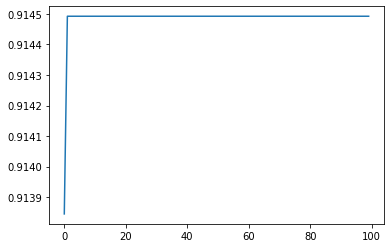

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()